<a href="https://colab.research.google.com/github/willxu1234/trading-bot/blob/main/alpaca_blueshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install alpaca to make trades and get market data.
!pip install alpaca_trade_api

# Install mpl_finance for financial data visualization.
# https://github.com/matplotlib/mplfinance
!pip install mplfinance

## Storing API Keys
In order to securely use the Alpaca API, you will need to provide your own API keys in a file on your personal Google Drive.
0. Sign up for Alpaca and get API keys (get paper trading keys for now).
1. Upload a file called keys.txt formatted like this: 
```
[default]
APCA-API-KEY-ID=<Your API key ID>
APCA-API-SECRET-KEY=<Your API secret key ID>
```
Keys will be generated by Alpaca and should be kept secret.
2. Open the file menu by clicking the file icon on the left side of Colab.
3. Select 'Mount Drive'.
4. Allow Google to access your Drive.

In [ ]:
# Get the API keys.
import os

with open("/content/drive/My Drive/keys.txt") as creds:
  for i, line in enumerate(creds):
    if i == 1:
      api_key_id = line.replace("APCA-API-KEY-ID=", "").replace("\n", "")
    elif i == 2:
      secret_key = line.replace("APCA-API-SECRET-KEY=", "").replace("\n", "")

In [ ]:
# Start retrieving market data.
# Taken from: https://alpaca.markets/docs/api-documentation/how-to/market-data/
import alpaca_trade_api as tradeapi

api = tradeapi.REST(api_key_id, secret_key, "https://paper-api.alpaca.markets")

In [ ]:
def get_market_price(ticker, days=5):
  # Get daily price data for SBE over the last few days.
  barset = api.get_barset(ticker, 'day', limit=days)
  bars = barset[ticker]

  # See how much our moved in that timeframe.
  open = bars[0].o
  close = bars[-1].c
  percent_change = (close - open) / open * 100
  print(f'{ticker} moved from ${open} to ${close}',
        f'({round(percent_change, 2)}%) in the last {days} days.')

In [ ]:
ticker = "SBE" #@param {type:"string"}
get_market_price(ticker)

SBE moved from $20.64 to $36.69 (77.76%) in the last 5 days.


In [ ]:
# How much of your stock you want to buy.
quantity =  5#@param {type:"integer"}

# Get account.
api.get_account()

# Order some SBE on the paper trading API.
api.submit_order(ticker, side='buy', qty=quantity, type='market', time_in_force='gtc')

Order({   'asset_class': 'us_equity',
    'asset_id': 'd03137f2-93a7-4f36-adb1-4a20737b501c',
    'canceled_at': None,
    'client_order_id': '4f0b6115-0af4-424c-97cf-132fde035d2e',
    'created_at': '2020-11-25T00:28:25.785281Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': 'def9f44a-a3a6-4744-95e7-bfd30241131e',
    'legs': None,
    'limit_price': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '5',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2020-11-25T00:28:25.780026Z',
    'symbol': 'SBE',
    'time_in_force': 'gtc',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2020-11-25T00:28:25.785281Z'})

In [ ]:
# List positions and orders.
print(api.list_positions())
print(api.list_orders())

[]
[Order({   'asset_class': 'us_equity',
    'asset_id': 'd03137f2-93a7-4f36-adb1-4a20737b501c',
    'canceled_at': None,
    'client_order_id': '4f0b6115-0af4-424c-97cf-132fde035d2e',
    'created_at': '2020-11-25T00:28:25.785281Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': 'def9f44a-a3a6-4744-95e7-bfd30241131e',
    'legs': None,
    'limit_price': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '5',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2020-11-25T00:28:25.780026Z',
    'symbol': 'SBE',
    'time_in_force': 'gtc',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2020-11-25T00:28:25.785281Z'}), Order({   'asset_class': 'us_equity',
    'asset_id': 'd03137f2-93a7-4

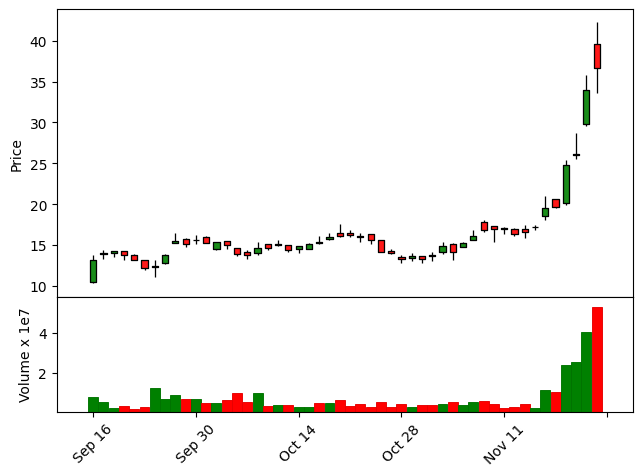

In [ ]:
# Generate candlestick.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

# Get data.
df = api.get_barset(ticker, 'day',  limit=50).df[ticker]

# Prep styling and plot.
mc = mpf.make_marketcolors(up='g',down='r', volume='in')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, type='candle', volume=True, style=s)